# Working with GAIA: 



https://sci.esa.int/gaia-stellar-family-portrait/




In [1]:
from astropy.wcs import WCS
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
np.set_printoptions(suppress=True)

## Part 1 - getting the RA and Dec information for your cluster

In [2]:

# data directory to your cluster
datadir = '/Users/sarah/Downloads/20201006'


#name of your cluster
cluster = 'M39'


Make folder called GAIA

In [3]:
os.mkdir(datadir + '/GAIA')


1. Go to http://nova.astrometry.net/upload and upload your V_stack.fit image of your cluster.  You are going to get the WCS (world coordinate system … aka the RA/DEC) of your cluster.  
2. Download the new-image.fits and save in a new folder called GAIA.  



## Part 2 - getting the RA and Dec positions of each of your stars. 

In [9]:
# open up your cluster photometry 
new_cluster = pd.read_csv(datadir + '/Stacked/' + cluster + '_photometry_final.csv')

new_cluster['B-V'] = new_cluster['B_mcal'] - new_cluster['V_mcal']
new_cluster['B-V_err'] = np.sqrt(new_cluster['B_mcal_err']**2. + new_cluster['V_mcal_err']**2.)

# get the xcent and y center columns 
xpos = new_cluster['xcenter']
ypos = new_cluster['ycenter']

# get the magnitude and color that you want to plot
all_mag = new_cluster['V_mcal']
all_color = new_cluster['B-V'] 


In [10]:
new_cluster

,Unnamed: 0,Unnamed: 0.1,id,xcenter,ycenter,Bflux,Bfluxerr,Rflux,Rfluxerr,Vflux,...,R_mcal,R_mcal_err,Vflux_1sec,Vflux_1sec_err,V_inst,Vinst_err,V_mcal,V_mcal_err,B-V,B-V_err
0,0,0,1,20.704157,4.674488,3990.066201,155.672044,0.000000,336.673631,10669.570501,...,inf,NaN,59.275392,1.266527,-4.432186,-0.023183,14.974558,0.073768,0.820183,0.110189
1,1,1,2,480.362851,4.339089,5550.711419,155.188319,0.000000,333.081660,12885.475410,...,inf,NaN,71.585975,1.367539,-4.637070,-0.020727,14.769675,0.073034,0.666645,0.105651
2,2,2,3,4090.404658,4.623774,3605.479802,127.376687,0.000000,299.294984,9423.275032,...,inf,NaN,52.351528,1.135052,-4.297323,-0.023524,15.109421,0.073876,0.795363,0.108789
3,3,3,4,400.698974,6.498508,4296.096360,158.506162,0.000000,353.091487,13677.229208,...,inf,NaN,75.984607,1.419144,-4.701814,-0.020264,14.704930,0.072904,1.009576,0.108745
4,4,4,5,590.552173,4.210737,21299.067120,186.890565,0.000000,331.666574,120799.453605,...,inf,NaN,671.108076,2.080317,-7.066981,-0.003363,12.339763,0.070112,1.636527,0.099570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747,2747,2747,2748,576.044496,4055.540141,2392.956457,170.008471,1934.020990,502.671782,11045.922838,...,16.624806,0.296024,61.366238,1.438495,-4.469824,-0.025434,14.936921,0.074506,1.412934,0.128067
2748,2748,2748,2749,4081.773752,4054.770663,1150.122661,163.155545,3384.343959,508.258058,6835.917925,...,16.017272,0.186160,37.977322,1.386099,-3.948811,-0.039600,15.457934,0.080452,1.687398,0.187272
2749,2749,2749,2750,4090.035129,4054.496340,2689.815684,147.168233,25073.320823,459.141465,9257.749225,...,13.842929,0.092192,51.431940,1.249011,-4.278082,-0.026349,15.128662,0.074824,1.094223,0.118451
2750,2750,2750,2751,3357.341640,4058.657188,7814.000385,180.011019,3176.471446,511.652139,17836.937487,...,16.086096,0.196591,99.094097,1.452382,-4.990119,-0.015902,14.416625,0.071814,0.648383,0.103392


In [12]:
# get the RA/DEC info for your stacked image.
wcs = WCS(fits.getheader(datadir + '/GAIA/' + cluster + '_Vstack_WCS.fits'))

In [14]:
#convert your x position and y position of your clusters to RA/DEC
ra,dec = wcs.all_pix2world(xpos,ypos,0)

# save to a text file
np.savetxt(datadir + '/GAIA/' + cluster + '_radec.txt', np.c_[np.array(ra),np.array(dec)], fmt='%1.9f')



## Part 3 - find the corresponding stars in the GAIA catalogue. 

We are going to use a database called VizieR, which stores catalogues for most of the data published in astronomy.  

1. Go to: http://vizier.u-strasbg.fr/viz-bin/VizieR
2. In the box below *Find catalogs among 18753 available* type: Gaia DR2
3. Click enter.
4. Select the row: **I/345** GAIA DR2 (Gaia Collaboration, 2018)
5. Click Query selected tables
6. Click the first link: **I/345/gaia2**
7. At the top of the page, click “List of Targets”
8. Click on “Choose File” and upload your file you made in step 5. 
9. Select “single file”.  Change target dimension to **1 arcsec**
10. Only select the following columns: **Plx, e_Plx, pmRA, e_pmRA, pmDE, e_pmDE**
11. Under “Preferences” on the left side, under max— select “unlimited” 
12. Click submit.  A .tsv file will be saved.  
13. Open the .tsv file in google sheets/ EXCEL.
14. Delete first 42 rows, the row with all - - - - - and the row with the units.
15. Save excel sheet as a .csv file.



## Part 4 - read in your GAIA data

Part 3 found the matching stars to all the stars you found.  Now we are going sort through them and find the ones with similar distances and motions.  These will be our cluster. 

In [86]:
# read in your GAIA data. 
GAIA = pd.read_csv(datadir + '/GAIA/' + cluster + '_gaia.csv',delimiter=';', comment='#')

In [87]:
GAIA.head()

,_r,_RAJ2000,_DEJ2000,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE
0,0.782,322.967005,48.066519,322.966978,0.0195,48.066494,0.0177,1978346259653264000,0.2530,0.0219,-4.251,0.041,-5.833,0.032
1,0.730,322.817998,48.060196,322.817999,0.0248,48.060175,0.0243,1978533241040500096,2.0284,0.0293,0.139,0.052,-4.725,0.051
2,0.827,322.826110,48.061091,322.826091,0.0232,48.061068,0.0220,1978533245349855616,0.4944,0.0271,-2.925,0.049,-5.212,0.045
3,0.675,322.884193,48.064619,322.884185,0.0255,48.064607,0.0242,1978532592514836480,0.4478,0.0305,-1.210,0.055,-2.746,0.048
4,0.462,322.864705,48.064934,322.864687,0.0325,48.064921,0.0316,1978532626874569984,0.3870,0.0397,-2.671,0.071,-3.031,0.066


In [88]:
GAIA['Plx'] = pd.to_numeric(GAIA['Plx'],errors='coerce')

## Part 5 - constrain objects by distance and proper motion

### Using the histograms, constrain the distance 

/Users/sarah/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/sarah/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


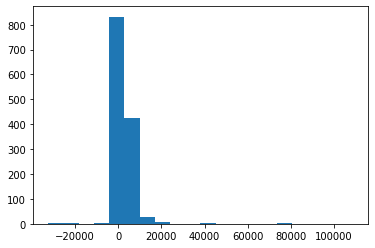

In [89]:
# find the distances to all stars from gaia using the parallax column in GAIA. 
# REMEMBER: distance = 1/parallax
distance  = 1000. / GAIA['Plx']


# plot a histogram of the distances of all the stars.
plt.figure()
plt.hist(distance.values, bins=20)
plt.show()


47


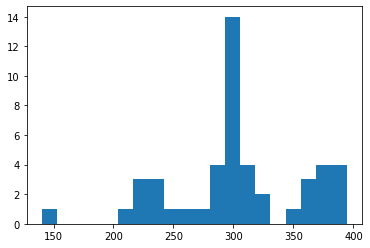

In [91]:
#constrain your distances.
ind = np.where((distance > 0) & (distance < 400))
# plot a histogram
plt.figure()
plt.hist(distance.values[ind], bins=20)
plt.show()

What range of distances does your cluster coorespond to?

Now, let's find all the stars with a similar motion within those distances.

In [92]:
# Put the range of distances of objects in your cluster. 
min_dist = 200
max_dist = 400


### Constrain by Proper Motion

In [93]:
GAIA['pmRA'] = pd.to_numeric(GAIA['pmRA'],errors='coerce')
GAIA['pmDE'] = pd.to_numeric(GAIA['pmDE'],errors='coerce')

Constrain the proper motion by changing the min and max PM values

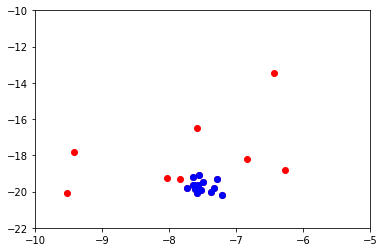

In [94]:
plt.figure()

pmRA = GAIA['pmRA'].loc[(distance < max_dist) & (distance > min_dist)]
pmDEC = GAIA['pmDE'].loc[(distance < max_dist) & (distance > min_dist)]
plt.plot(pmRA, pmDEC, 'ro')


# CHANGE Limits and select data points
# Change the limits to find the clump of stars with similar proper motions.

min_pmRA = -7.8
max_pmRA = -7

min_pmDEC =-21
max_pmDEC = -18


pmRA_2 = pmRA.loc[(pmRA > min_pmRA) & (pmRA < max_pmRA) &(pmDEC > min_pmDec) & (pmDEC < max_pmDEC)]
pmDEC_2 = pmDEC.loc[(pmRA > min_pmRA) & (pmRA < max_pmRA) &(pmDEC > min_pmDec) & (pmDEC < max_pmDEC)]
plt.plot(pmRA_2, pmDEC_2, 'bo')

plt.xlim(-10,-5)
plt.ylim(-22, -10)


plt.show()


# -7.3569 -19.5993



# Part 6 - Find cluster stars in your image by matching stars between your catalogue and gaia. 

In [96]:
GAIA['_RAJ2000'] = pd.to_numeric(GAIA['_RAJ2000'],errors='coerce')
GAIA['_DEJ2000'] = pd.to_numeric(GAIA['_DEJ2000'],errors='coerce')

In [103]:

# We want to match stars from the gaia catalogue to our catalogue within one arcsecond. 
tol = 1./3600.
ngood=0

# Save the magnitude and color of the cluster stars! 
cluster_mag = []
cluster_color = []

# go through all the stars in the gaia catalogue
for src in range(0,len(GAIA['_RAJ2000'])):

    # calculate the distance between each star in the gaia catalogue and each star in your catalogue. 
    dist = ( (np.cos(GAIA['_DEJ2000'][src]*np.pi/180.)*(GAIA['_RAJ2000'][src] - ra))**2.0 + \
                (GAIA['_DEJ2000'][src] - dec)**2.0 )**0.5  
    
    # find the stars in your catalogue that are closest to each star in gaia. 
    x = np.where(dist==np.min(dist))[0]#[0]

    # if the clostest stars from GAIA and your catalogue are within 1":  
    if np.min(dist) <= tol:
        
        # determine if the stars have the distance range you found above. 
        if ((1000./GAIA['Plx'][src] > min_dist ) & (1000./GAIA['Plx'][src] < max_dist) & 
            (GAIA['pmRA'][src] > min_pmRA) & (GAIA['pmRA'][src] < max_pmRA) &  
            (GAIA['pmDE'][src] > min_pmDEC) & (GAIA['pmDE'][src] < max_pmDEC)):
                    
                ngood += 1
                cluster_mag.append(all_mag.values[x][0])
                cluster_color.append(all_color.values[x][0])
                    
print('number of cluster members found:', len(np.unique(cluster_color)))                 

number of cluster members found: 12


# Part 7 - Plot

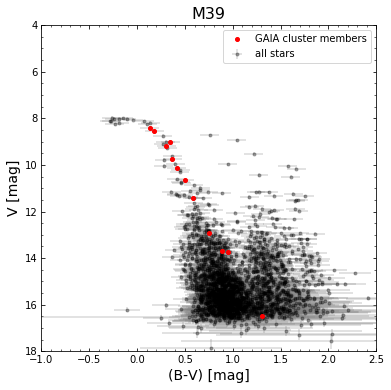

In [104]:
# plot the gaia selected cluster members (cluster_X) and all stars (all_X) CMD in your field. 

yerr = new_cluster['V_mcal_err']
xerr = new_cluster['B-V_err']

plt.figure(figsize=(6,6))
#plot the original CMD
plt.errorbar(all_color, all_mag, yerr = yerr,xerr=xerr,
             color='k', fmt='.', label='all stars', ecolor='gray',alpha=0.3)

#plot the gaia selected members CMD as red.
plt.plot(cluster_color, cluster_mag, 'r.', label='GAIA cluster members', zorder=5, markersize=8)

plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('(B-V) [mag]', fontsize=14)
plt.ylabel('V [mag]', fontsize=14)
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.minorticks_on()
plt.ylim(18, 4)
plt.xlim(-1, 2.5)
plt.title(cluster, fontsize=16)
plt.savefig(datadir + '/GAIA/' + cluster + '_CMD.png', dpi=150)
plt.show()